In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import itertools
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture

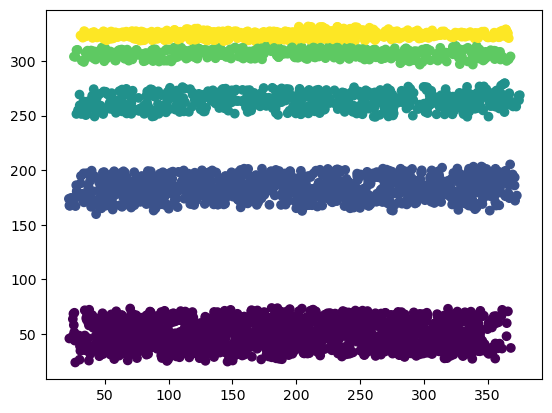

In [2]:
data = pd.read_csv('../Desktop/ćwiczenia na KMeans/lines.csv')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns = ['color']))
plt.scatter(data['x'], data['y'], c = data['color'])
plt.show()

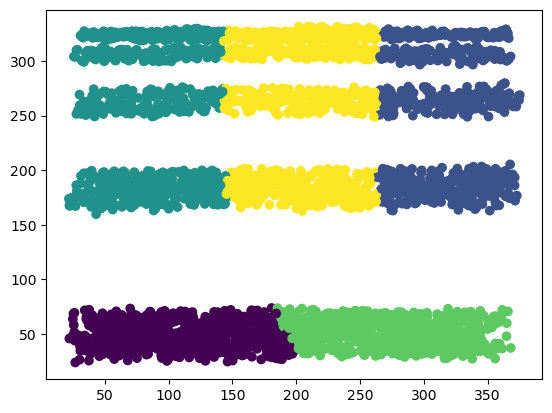

In [3]:
gmm = GaussianMixture(n_components = 5, covariance_type = "full")
labels = gmm.fit_predict(data_scaled)
plt.scatter(data['x'], data['y'], c = labels)
plt.show()

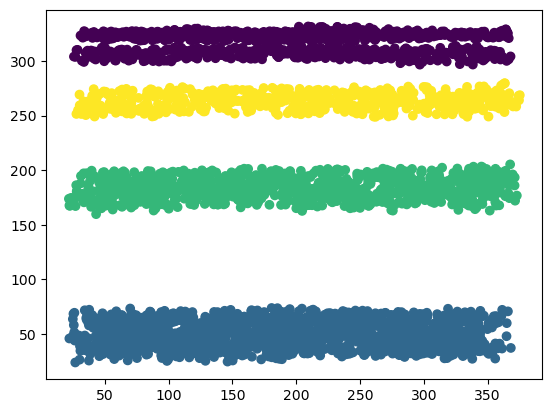

In [13]:
dbscan = DBSCAN(eps = 0.1, min_samples = 5)
dbscan.fit(data_scaled)
plt.scatter(data['x'], data['y'], c = dbscan.labels_)
plt.show()

Liczba 0 występuje 1012 razy
Liczba 1 występuje 3053 razy


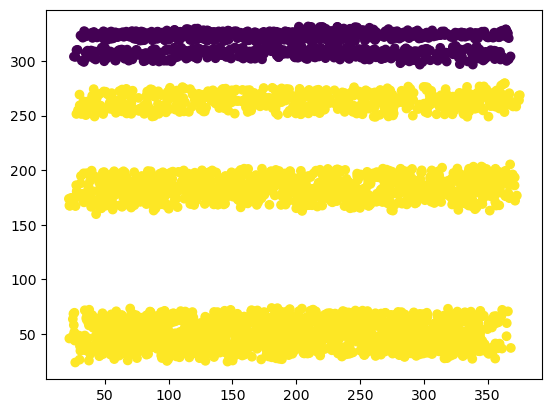

In [12]:
labels_count = dbscan.labels_
labels_count[labels_count != 0] = 1
unique_values, counts = np.unique(labels_count, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Liczba {value} występuje {count} razy")
plt.scatter(data['x'], data['y'], c = labels_count)
plt.show()

In [14]:
ari = adjusted_rand_score(data['color'], dbscan.labels_)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.9211071030080702
